# Week 10 Root finding
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 28.3.2017  
Helsinki Metropolia University of Applied Sciences

In [2]:
# Initial import statements
%pylab inline
from scipy.optimize import newton

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Exercises from Exercise 9

### Functions from exercise 1 and their graphical presentations.

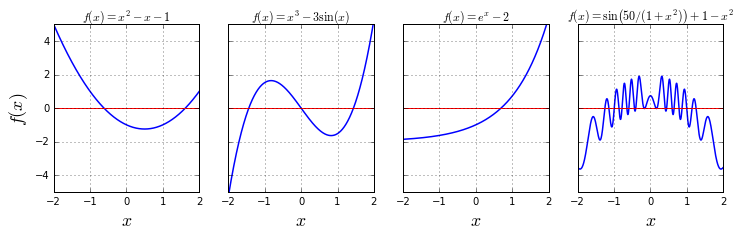

In [5]:
f1 = lambda x: x**2 - x - 1
f2 = lambda x: x**3 - 3 * sin(x)
f3 = lambda x: exp(x) - 2
f4 = lambda x: 1 - x**2 + sin(50 / (1 + x**2))

x = linspace(-2, 2, 1000)
fig, axes = subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f(x), lw=1.5)
    axes[n].axhline(0, color='r')
    axes[n].grid()
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
axes[0].set_ylabel(r'$f(x)$', fontsize=18)
titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$', r'$f(x)=e^x-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

### Our implementation of increment search and bisection search from previous exercises.

In [30]:
def incrementSearch(f, a, b, dx):
    """
    Inputs:
       f = the function 
       a = lower limit of the domain
       b = upper limit of the domain
       dx = step of the increment
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    x0 = a
    n = 0
    while (x0 < b):
        if sign(f(x0)) != sign(f(x0 + dx)):
            return x0 + dx, n + 1
        x0 += dx    
        n += 1

    return None, n

def bisectSearch(f, a, b, tol, maxiter):
    """ bisectSearch(f, a, b, tol, maxiter)
    My version of the bisectional root searching algorithm.
    Inputs:
       f = the function 
       a = lower limit of the domain
       b = upper limit of the domain
       tol = tolerance for the root value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    x0, n = None, 0
    while (b - a > tol and n < maxiter):
        x0 = a + (b - a) / 2
        if sign(f(a)) == sign(f(x0)):
            a = x0
        else:
            b = x0   
        n += 1
    return x0, n  

## Exercise 5
Study the function `newton()` found in module `scipy.optimize`. Use that function to find the roots of the problem 1. Use tolerance value of 0.01. Try different initial estimate values $x_0$. Compare the results to the previous results. What do you observe?

## Solution
`scipy.optimize.newton()` finds a root of a function $f$ nearby the starting point $x_0$. In this case, because we do not provide the derivative function $fprime$ of $f$, the secant method will be used instead of the Newton-Raphson method. 
Which each function, we have to choose the value of $x_0$ so that we get a root that we can compare with the roots we found in previous exercises.  

In [38]:
# array functions
fs = [f1, f2, f3, f4]
# array of initial guess x0 of each function
x0_s = [0, -1, 2, -1.3]

i = 0
print("Root found by scipy.optimize.newton:")
for f in fs:
    i += 1
    x0 = newton(f, x0_s[i-1], tol=0.01)
    print("\tFunction f{}:".format(i))
    print("\t\tRoot x0 = {0:.4f}".format(x0))

Root found by scipy.optimize.newton:
	Function f1:
		Root x0 = -0.6180
	Function f2:
		Root x0 = -1.4379
	Function f3:
		Root x0 = 0.6935
	Function f4:
		Root x0 = -1.2529


We could see that the roots found by `newton` is similar to the ones from previous exercises. However, we achieve this because we know the roots in advance and therefore set the initial $x_0$ close enough to the solution we are hoping to get. In particular, for function 4, there are many roots in the interval and many points that $f' = 0$ could make the algorithm not converge. 

## Exercise 6
Write your own code that implements the Newton-Raphson method.
The function should return the estimate for the root, $x_0$, and the number of iterations. The code should estimate the derivative of the function numerically $f ′(x) = (f(x + h) − f(x))/h$, where h is a small number.
Test that function with the examples given in problem 1 and compare the results to previous results.

## Solution
First we need to define a function that estimate the derivative of function numercially $f ′(x) = (f(x + h) − f(x))/h$, where h is a small number with default value $10^{-8}$.  
Then we implement the Newton-Raphson algorithm that by each iteration a new estimate of $x_0$ is calculated based on the current values of $x_0, f(x_0), f'(x_0)$. We return the value of the root when $f(x_0)$ falls within the tolerance criteria.  

In [44]:
def derivative(f, x, h = 1e-8):
    """ 
    Inputs:
       f = the function 
       x = point to estimate the derivative on
       h = small number, default value 1e-8
    Outputs:
       df = estimate of the derivative of f at point x
    """
    df = (f(x + h) - f(x)) / h
    return df

def newtonSearch(f, x0, tol = 0.01, maxiter = 200):
    """ 
    Inputs:
       f = the function 
       x0 = initial estimate of a root
       tol = tolerance for the root value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    n = 0
    while(abs(f(x0)) > tol and n < maxiter):
        x0 = x0 - f(x0) / derivative(f, x0)
        n += 1
    return x0, n 


In [50]:
# array of initial guess x0 of each function
x0_s = [-2, -2, 2, -1.3]
i = 0
print("Root found by newtonSearch:")
for f in fs:
    i += 1
    x0, n = newtonSearch(f, x0_s[i - 1])
    print("\tFunction f{}:".format(i))
    print("\t\tRoot x0 = {0:.4f}".format(x0))
    print("\t\tNumber of steps n = {}".format(n))

Root found by newtonSearch:
	Function f1:
		Root x0 = -0.6190
		Number of steps n = 3
	Function f2:
		Root x0 = -1.4384
		Number of steps n = 3
	Function f3:
		Root x0 = 0.6932
		Number of steps n = 4
	Function f4:
		Root x0 = -1.2524
		Number of steps n = 1


We could see that the roots found by our `newtonSearch` are similar to the results of previous exercises. We could also notice the number of iterations of `newtonSearch` is less than other methods, however it may depend on our initial guess of $x_0$.

## Exercise 7
By combining the incremental, bisectional and Newton-Raphson methods write a code that finds multiple roots of a function within a given domain. The code should use inputs: $f$ the function, $a$ and $b$ the limits of the domain, $tol$ the tolerance of the root estimates, $dx$ the step size for incremental search, and $maxiter$ the maximum iterations in bisectional or Newton-Raphson iterations.
Test your code with the examples given in problem 1 and compare the results to the previous results.

## Exercises from week 10 

## Exercise 1

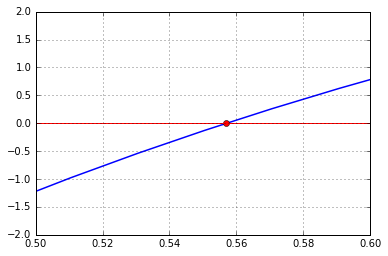

In [27]:
f = lambda x: -26 + 85*x - 91 * x**2 + 44 * x**3 - 8 * x**4 + x**5

# a - solve graphically
x = linspace(-10, 10, 1000)
xlim(0.50, 0.6)
ylim(-2, 2)
plot(x, f(x), lw = 1.5)
plot(0.557, 0, 'ro')
grid()
axhline(0, color='r')
show()

In [60]:
# b - using simple fixed-point iteration
f = lambda x: -26 + 85*x - 91 * x**2 + 44 * x**3 - 8 * x**4 + x**5

g = lambda x: -(-26 - 91 * x**2 + 44 * x**3 - 8 * x**4 + x**5)/85.0


def fixedPoint(g, x0, tol=0.01, maxiter=100):
    """
    simple fixed-point iteration algorithm
    """
    e = 1
    n = 0
    while (e > tol and n < maxiter):
        x = g(x0)
        e = abs(x - x0) # calculate error
        x0 = x
        n += 1
    return x0, n

x0, n = fixedPoint(g, 2, tol = 1e-6)
print("Root found by fixedPoint:")
print("\tRoot x0 = {0:.4f}".format(x0))
print("\tNumber of steps n = {}".format(n))


Root found by fixedPoint:
	Root x0 = 0.5570
	Number of steps n = 56


## Exercise 5

$(x-2)^2 + y^2 - 4 = 0 \\
x^2 + (y-3) -4  = 0$ 

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


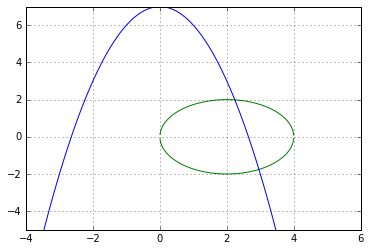

In [47]:
def f(x):
    f1 = (x[0] - 2)**2 + x[1]**2 - 4
    f2 = x[0]**2 + x[1] - 7
    return [f1, f2]

figure()
x = linspace(-4, 6, 1000)
y1 = sqrt(-(x - 2)**2 + 4)
y2 = -sqrt(-(x - 2)**2 + 4)
plot(x, y1, 'g')
plot(x, y2, 'g')
y3 = -x**2 + 7
plot(x, y3, 'b')
grid()
ylim(-5, 7)
show()



solution 1: [ 2.2392778   1.98563495]
solution 2: [ 2.95890761 -1.75513424]


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


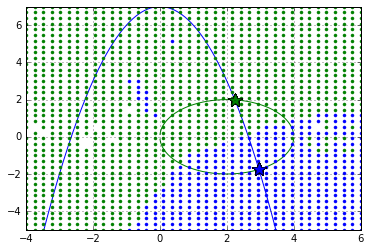

In [50]:
from scipy.optimize import fsolve
sol1 = fsolve(f, [2 , 2])
sol2 = fsolve(f, [3 , -2])
print("solution 1:", sol1)
print("solution 2:", sol2)

figure()
x = linspace(-4, 6, 1000)
y1 = sqrt(-(x - 2)**2 + 4)
y2 = -sqrt(-(x - 2)**2 + 4)
plot(x, y1, 'g')
plot(x, y2, 'g')
y3 = -x**2 + 7
plot(x, y3, 'b')

colors = ['g', 'b']
for m in linspace(-4, 6, 40):
    for n in linspace(-5, 7, 40):
        x_guess = [m, n]
        sol = fsolve(f, x_guess)
        
        for i, s in enumerate([sol1, sol2]):
            if abs(s - sol).max() < 1e-8:
                plot(sol[0], sol[1], colors[i] + '*', markersize = 15)
                plot(x_guess[0], x_guess[1], colors[i]+'.')
ylim(-5, 7)                
grid()
show()
        

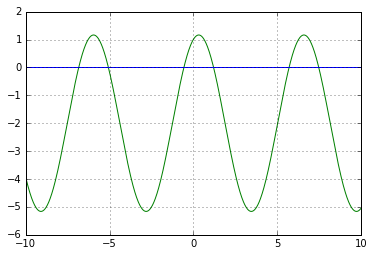

In [59]:
def f(x):
    f1 = sin(x[0]) + 3 * cos(x[0]) - 2
    f2 = cos(x[0]) - 3 * sin(x[1])
    return [f1, f2]

figure()
x = linspace(-10, 10, 1000)
f1 = sin(x) + 3 * cos(x) - 2
plot(1,1, 'ro')
plot(x, f1, 'g')
axhline(0)

grid()

show()


1.2246467991473532e-16